In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import statsmodels.api as sm
from matplotlib import rcParams

In [30]:
sd=pd.read_csv('Data/superstoresales.csv')
sd['Order Date']=pd.to_datetime(sd['Order Date'])
#superstore_data=superstore_dataset.loc(superstore_dataset['Order Date']<'2018-12-31')
#superstore_data=superstore_dataset(superstore_dataset['Order Date']<'2017-12-31')
sd.sort_values(by='Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
540,541,CA-2015-140795,2015-01-02,03/02/2015,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
5713,5714,US-2015-143707,2015-01-03,05/03/2015,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
157,158,CA-2015-104269,2015-01-03,06/03/2015,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
6548,6549,CA-2015-113880,2015-01-03,05/03/2015,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
7949,7950,CA-2015-131009,2015-01-03,05/03/2015,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
645,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
907,908,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
906,907,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136


In [31]:
all_stock=pd.read_csv('Data/all_stocks_2006-01-01_to_2018-01-01.csv')
all_stock['Date']=pd.to_datetime(all_stock['Date'])
all_stock

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [34]:
ss=all_stock.loc[(all_stock['Date']>'2015-01-01') & (all_stock['Date']<'2018-12-31')]
#Change the index into Date
#selected_stock=selected_stock.set_index('Date')
ss

,Date,Open,High,Low,Close,Volume,Name
2265,2015-01-02,164.71,165.08,162.73,164.06,2117562,MMM
2266,2015-01-05,163.00,163.64,160.08,160.36,3692901,MMM
2267,2015-01-06,160.82,161.37,157.74,158.65,3537144,MMM
2268,2015-01-07,159.90,160.28,158.94,159.80,3081291,MMM
2269,2015-01-08,160.65,163.69,160.52,163.63,3149592,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


# Data Processing

In [35]:
ss.isna().sum()

Date       0
Open      24
High       9
Low       19
Close      0
Volume     0
Name       0
dtype: int64

In [41]:
ss=ss.dropna()
ss_by_day=selected_stock.groupby(pd.Grouper(key='Date',freq='D')).mean()
ss_by_day

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,108.803548,109.486774,107.436452,108.204516,1.043644e+07
2015-01-03,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN
2015-01-05,107.687742,108.025806,105.778710,106.165161,1.470924e+07
2015-01-06,106.354839,106.939355,104.188710,104.967097,1.640031e+07
...,...,...,...,...,...
2017-12-25,NaN,NaN,NaN,NaN,NaN
2017-12-26,184.319355,185.290645,183.348387,184.581613,6.884408e+06
2017-12-27,184.845806,185.518387,183.946774,184.681613,7.374016e+06


In [32]:
sd.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

            Row ID  Postal Code     Sales
Order Date                               
2015-01-02     541      54302.0   468.900
2015-01-03   67388     702102.0  2203.151
2015-01-04   18656     193484.0   119.888
2015-01-05       0          0.0     0.000
2015-01-06   24554     533508.0  5188.520
2015-01-07    3355     163555.0   601.024
2015-01-08   11942     226062.0   228.328
2015-01-09   24036     266115.0   469.436
2015-01-10    8706      89502.0     4.710
2015-01-11   80226     831061.0  4637.816
2015-01-12   55754     485626.0  5624.390
2015-01-13   40885     753456.0  3553.795
2015-01-14    6475      19140.0    61.960
2015-01-15    1914      30076.0   149.950
2015-01-16    3890      76536.0   299.964
2015-01-17       0          0.0     0.000
2015-01-18    5365      97477.0    64.864
2015-01-19   21858     341016.0   378.594
2015-01-20   75987    1037151.0  2673.870
2015-01-21       0          0.0     0.000


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

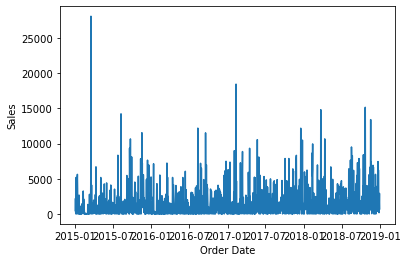

In [22]:
sd.dropna()
sd_by_day=sd.groupby(pd.Grouper(key='Order Date', freq='1D')).sum()
print(sd_by_day.head(20))
sns.lineplot(x=sd_by_day.index,y=sd_by_day['Sales'])

            Row ID  Postal Code       Sales
Order Date                                 
2015-01-04   86585     949888.0   2791.9390
2015-01-11  152819    2109803.0  11129.8340
2015-01-18  114283    1462311.0   9754.9230
2015-01-25  107001    1467282.0   3092.5440
2015-02-01   64990     746824.0   2059.0140
...            ...          ...         ...
2018-12-02  262885    2510746.0  21565.0600
2018-12-09  254913    2433447.0   7261.7420
2018-12-16  490480    6182350.0  14181.0200
2018-12-23  437169    5114149.0  19457.0680
2018-12-30  378463    4503416.0  15210.8858

[209 rows x 3 columns]


Text(0.5, 1.0, 'Super Store')

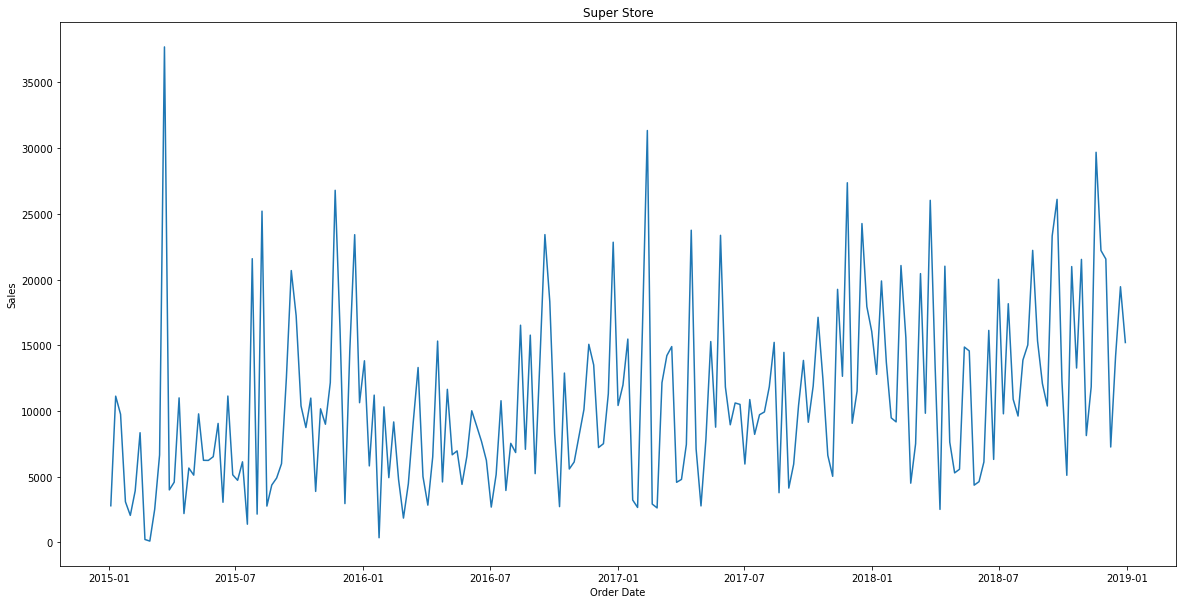

In [21]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

sd_by_week=sd.groupby(pd.Grouper(key='Order Date', freq='1W')).sum()
print(sd_by_week)
sns.lineplot(x=sd_by_week.index,y=sd_by_week['Sales'],ax=ax)

ax.set_title('Super Store')

# Decomposition

## Seasonality

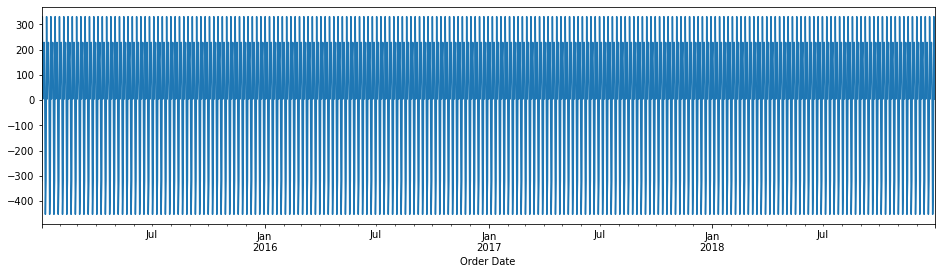

In [64]:
decomposition = sm.tsa.seasonal_decompose(sd_by_day["Sales"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

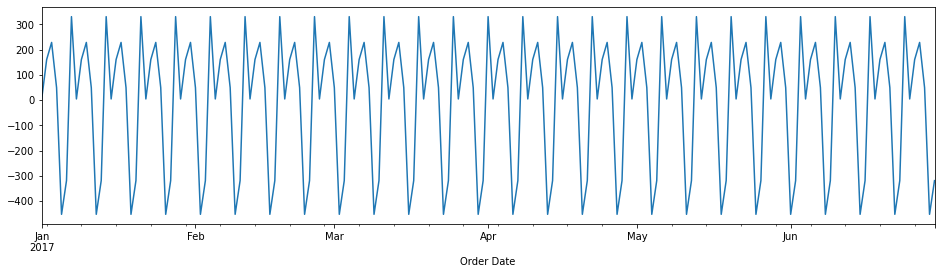

In [26]:
decomposition.seasonal["2017-Jan":"2017-Jun"].plot();

## Trend

Order Date
2015-01-02            NaN
2015-01-03            NaN
2015-01-04            NaN
2015-01-05    1258.544429
2015-01-06    1258.621000
                 ...     
2018-12-26    2346.267400
2018-12-27    2172.983686
2018-12-28            NaN
2018-12-29            NaN
2018-12-30            NaN
Freq: D, Name: trend, Length: 1459, dtype: float64


<AxesSubplot:xlabel='Order Date'>

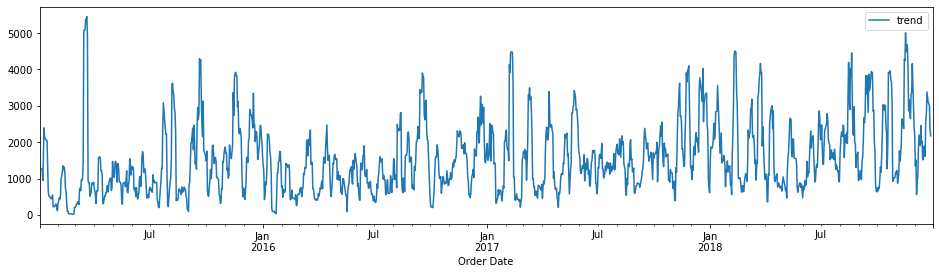

In [65]:
#decomposition = sm.tsa.seasonal_decompose(sd_by_day["Sales"])

trend = decomposition.trend
print(trend)
pd.DataFrame(trend).plot()

## Noise

<AxesSubplot:xlabel='Order Date'>

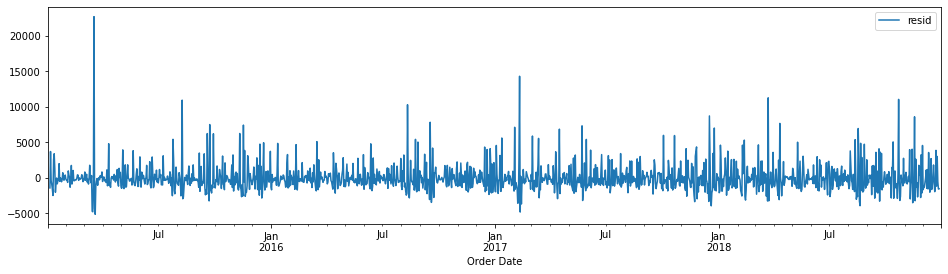

In [29]:
resid=decomposition.resid
pd.DataFrame(resid).plot()

# Calculation

<AxesSubplot:xlabel='Order Date'>

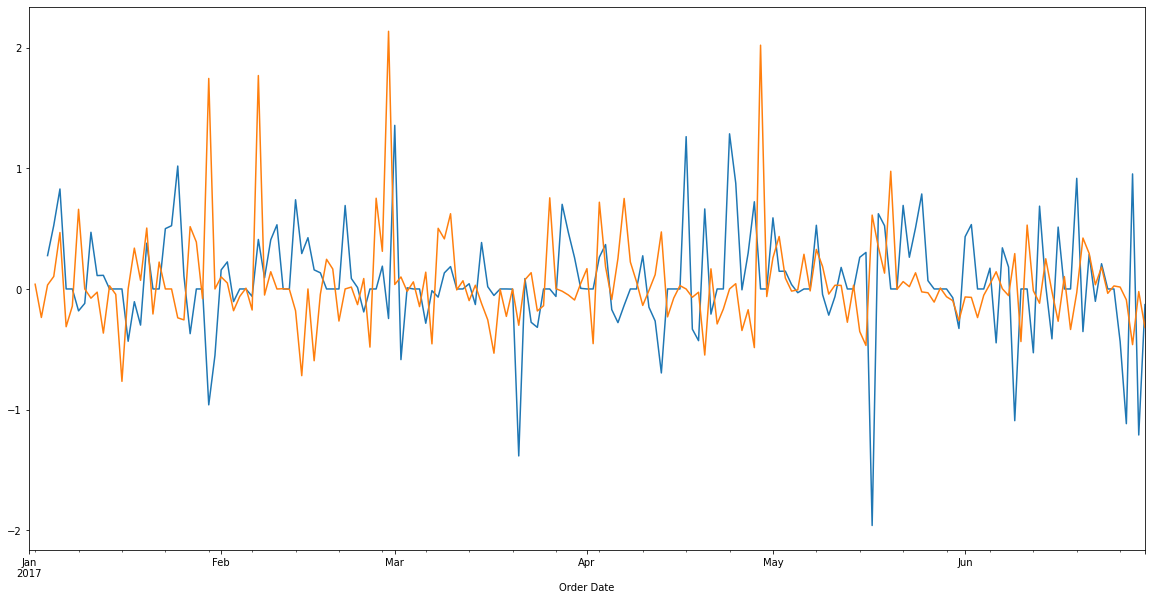

In [87]:
#trend1=trend/abs(trend)
#print('trend',trend['2017-Jan':'2017-Jun'].head(30))
#print('ss',ss_by_day['2017-Jan':'2017-Jun']['Close']*1000)
#trend1=trend/1000

ROC_stock=(ss_by_day['2017-Jan':'2017-Jun']['Close']).pct_change()*100
ROC_stock.plot(figsize=(20, 10))

ROC_SS=trend['2017-Jan':'2017-Jun'].pct_change()
ROC_SS.plot()